In [1]:
import pandas as pd
import numpy as np

from kmeans import KMeans

# Disclaimer

### This is just an example notebook for the self implemented kmeans algorithm. It shows most of the implemented functionality for the kmeans algorithm. 

In [2]:
def read_present_data(synthetic_data = False):

    df_customers = pd.read_csv('../datasets/Mall_Customers.csv') 
    df_customers.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
    
    # Additional synthetic columns
    df_customers['Number of Purchases'] = np.random.randint(1, 20, size=len(df_customers))
    df_customers['Average Purchase Amount'] = np.round(np.random.uniform(10, 1000, size=len(df_customers)), 2)
    
    if synthetic_data:
        synthetic_data_size = 800
        # Additional synthetic rows
        new_rows = {
            'Age': np.random.randint(df_customers['Age'].min(), df_customers['Age'].max(), size=synthetic_data_size),
            'Annual Income (k$)': np.random.randint(df_customers['Annual Income (k$)'].min(), df_customers['Annual Income (k$)'].max(), size=synthetic_data_size),
            'Spending Score (1-100)': np.random.randint(df_customers['Spending Score (1-100)'].min(), df_customers['Spending Score (1-100)'].max(), size=synthetic_data_size),
            'Number of Purchases': np.random.randint(df_customers['Number of Purchases'].min(), df_customers['Number of Purchases'].max(), size=synthetic_data_size),
            'Average Purchase Amount': np.random.uniform(df_customers['Average Purchase Amount'].min(), df_customers['Average Purchase Amount'].max(), size=synthetic_data_size),
        }
        # Concatenate the new data to the existing DataFrame
        df_customers = pd.concat([df_customers, pd.DataFrame(new_rows)], ignore_index=True)

    return df_customers

In [3]:
df_customers = read_present_data()
df_customers

,Age,Annual Income (k$),Spending Score (1-100),Number of Purchases,Average Purchase Amount
0,19,15,39,15,895.95
1,21,15,81,14,115.04
2,20,16,6,13,557.01
3,23,16,77,17,598.78
4,31,17,40,9,907.36
...,...,...,...,...,...
195,35,120,79,9,622.94
196,45,126,28,2,840.88
197,32,126,74,18,282.17
198,32,137,18,6,216.98


## Cluster Method random initialization

In [4]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'random', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

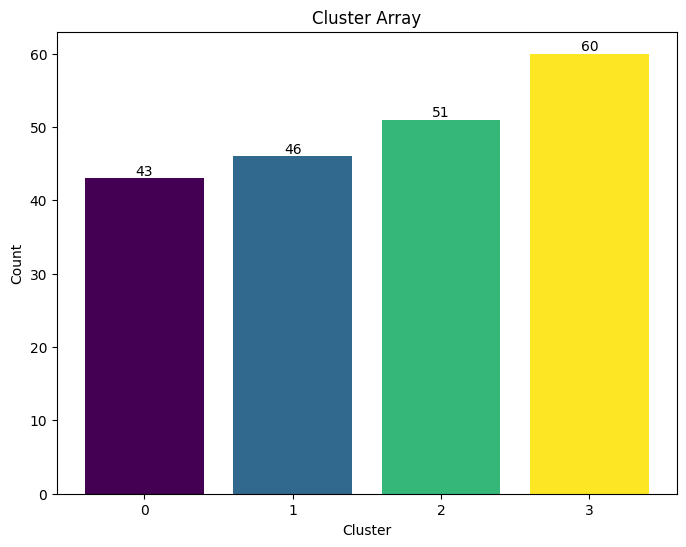

Cluster Array
 [0 2 1 1 0 0 1 0 2 0 0 3 3 3 0 0 3 2 2 2 2 1 0 3 2 2 3 1 1 2 3 3 3 3 1 3 2
 1 3 0 0 3 2 3 2 2 3 0 3 2 0 2 1 1 1 1 1 3 2 3 1 0 0 3 1 2 2 1 1 2 2 2 2 1
 2 1 0 2 1 3 2 2 3 3 2 3 3 1 1 3 3 1 1 2 0 0 0 0 3 3 1 1 3 3 2 2 1 1 3 3 2
 2 2 0 2 1 1 3 1 3 3 0 1 2 2 3 3 0 2 3 3 2 1 0 0 1 1 0 0 0 0 1 0 3 3 2 0 0
 2 2 0 2 1 0 0 3 3 0 1 1 2 1 2 3 1 3 1 3 0 1 3 2 3 3 0 0 1 3 3 3 0 0 3 3 2
 3 2 3 3 2 2 0 3 3 3 1 0 2 2 1] 

Cluster Centroids
 [[-0.43079607 -0.32369862 -0.37473645 -0.54178798  3.35222313]
 [-0.41378569 -0.32794732 -0.37441117 -0.53919019  2.29105525]
 [-0.42021192 -0.32956843 -0.36663808 -0.54377741  0.01176177]
 [-0.40823558 -0.30893386 -0.35740955 -0.54448164  1.32798072]]


In [5]:
print("Cluster Array\n", kmeans.get_cluster_array(visualize=True), "\n")
print("Cluster Centroids\n", kmeans.get_centroids())

## Cluster Method kmeans++

In [6]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers, scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=False, plot_data=False)

In [7]:
print("Cluster Array\n", kmeans.get_cluster_array(), "\n")
print("Cluster Centroids\n", kmeans.get_centroids())

Cluster Array
 [0 1 3 3 0 0 3 0 1 0 0 3 2 3 0 0 2 1 1 1 1 3 0 2 1 1 2 3 3 1 2 2 2 3 3 3 1
 3 2 0 0 3 1 2 2 2 2 0 2 1 0 1 3 0 0 3 3 2 1 2 3 0 0 2 3 1 1 3 3 1 1 1 1 3
 2 3 0 1 3 2 1 1 2 2 1 2 2 3 3 3 2 3 3 1 0 0 0 0 3 3 3 3 2 2 2 1 3 3 3 2 2
 1 1 0 2 3 3 3 3 2 2 0 3 1 1 2 2 0 2 3 3 1 0 0 0 3 3 0 0 0 0 3 0 3 2 2 0 0
 2 2 0 1 3 0 0 3 2 0 3 3 1 3 2 2 3 3 3 3 0 3 2 1 2 3 0 0 3 2 3 2 0 0 3 3 1
 2 1 2 2 1 1 0 3 2 3 3 0 2 1 3] 

Cluster Centroids
 [[-0.42825176 -0.32583968 -0.37536919 -0.54091462  3.31525938]
 [-0.42150142 -0.34398551 -0.36556793 -0.54206916 -0.16488875]
 [-0.40300608 -0.31416336 -0.37709362 -0.5434093   0.97737442]
 [-0.4183827  -0.3113294  -0.35539821 -0.54319913  2.07496674]]


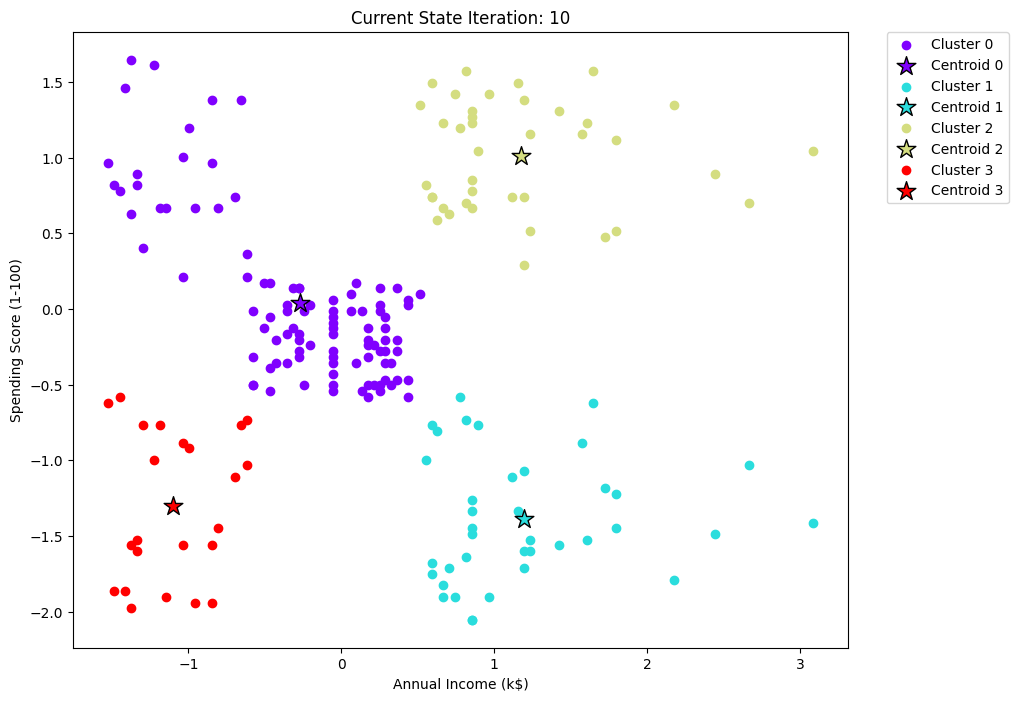

In [8]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers[['Annual Income (k$)', 'Spending Score (1-100)']], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=True, plot_data=True, gif_path='./kmeans.gif')

In [9]:
kmeans = KMeans(k = 4, max_iter = 10, cluster_method = 'kmeans++', distance_metric='euclidean', random_state = 42)
kmeans.fit(df_customers[['Annual Income (k$)', 'Spending Score (1-100)', 'Average Purchase Amount']], scaling_method='standardization')#, 'Average Purchase Amount', 'Spending Score (1-100)'])
kmeans.perform(show_initial_centroids=True, plot_data=True)